### Imports

In [6]:
from skin_data import (
    SkinData, 
    simulate_skin_data, 
    print_skin_data, 
    find_highest_pressure,
    apply_Knn,
    reorder_clusters,
    apply_KMC, 
    get_cluster_metrics
)
from tactile_objects import (
    TactileObjects,
    TactileObjectsTask
)
from experiment_setup import ExperimentSetup
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%matplotlib nbagg 

### load data

In [7]:
task4 = frozenset({frozenset({'Sphere', 'HSphere'}), frozenset({'HCube', 'Cube'})})
trial_number = 100
task4_means = []
task4_stds = []

for taxel_reduction_num in range(10):
    accs = []
    for experiment_try in range(trial_number):
        exp_setup = ExperimentSetup("./../data/skin_experiments.mat", 
                                    best_pressure_time=140, 
                                    resolution_reduction=taxel_reduction_num)
        new_accs = exp_setup.run_experiment(
            '3mil', 
            which_clustering='k_means',
            task = task4, 
            show=False, 
            save=False
        )
        accs += [new_accs]
    mean = np.mean(accs)
    std = np.std(accs)
    
    task4_means += [mean]
    task4_stds += [std]

In [3]:
task5 = frozenset({frozenset({'Sphere', 'Cube'}), frozenset({'HCube', 'HSphere'})})
trial_number = 100
task5_means = []
task5_stds = []

for taxel_reduction_num in range(10):
    accs = []
    for experiment_try in range(trial_number):
        exp_setup = ExperimentSetup("./../data/skin_experiments.mat", 
                                    best_pressure_time=140, 
                                    resolution_reduction=taxel_reduction_num)
        new_accs = exp_setup.run_experiment(
            '10mil', 
            which_clustering='k_means',
            task = task5, 
            show=False, 
            save=False
        )
        accs += [new_accs]
    mean = np.mean(accs)
    std = np.std(accs)
    
    task5_means += [mean]
    task5_stds += [std]

<IPython.core.display.Javascript object>


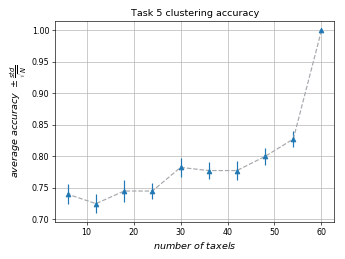

In [8]:
fig_size = (6, 4.5) 
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(np.multiply(list(range(10,0,-1)),6), task4_means, yerr=np.array(task4_stds)/np.sqrt(trial_number), linestyle='None', marker='^')
ax.plot(np.multiply(list(range(10,0,-1)),6), task4_means, '--', color='#a6a9ad')
ax.set_title('Task 5 clustering accuracy')
ax.set_xlabel('$number\ of\ taxels$', fontsize=12)
ax.set_ylabel('$average\ accuracy\ \pm \\frac{std}{\\sqrt{N}}$', fontsize=12)
ax.grid('on')
ax.legend(loc='best', fontsize=11) 
fig.tight_layout() 
fig.savefig('./../manuscript/generated_figures/Task5_accuracy_map.pdf') 


<IPython.core.display.Javascript object>


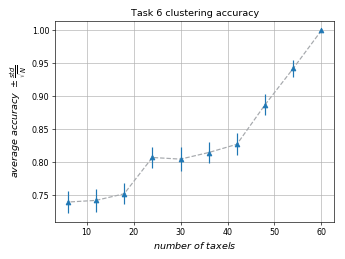

In [5]:
fig_size = (6, 4.5) 
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(np.multiply(list(range(10,0,-1)),6), task5_means, yerr=task5_stds/np.sqrt(trial_number), linestyle='None', marker='^')
ax.plot(np.multiply(list(range(10,0,-1)),6), task5_means, '--', color='#a6a9ad')
ax.set_title('Task 6 clustering accuracy')
ax.set_xlabel('$number\ of\ taxels$', fontsize=12)
ax.set_ylabel('$average\ accuracy\ \pm \\frac{std}{\\sqrt{N}}$', fontsize=12)
ax.grid('on')
ax.legend(loc='best', fontsize=11) 
fig.tight_layout() 
fig.savefig('./../manuscript/generated_figures/Task6_accuracy_map.pdf') 